In [166]:
#performing sentiment analysis which is supervised learning

#I will use rollerblading and rollerskating
#I will use a random forest classifier or a knn model.

#collect posts from 2 subreddits and use NLP to train a classifier on what given post it came
#from. This is a binary classification problem.

## Problem Statement

Can our models predict which subreddit a certain post comes from, while also being optimized for a higher score? We will be analyzing rollerblading and rollerskating. 

In [1]:
import requests
import pandas as pd
import logging as logging
import time

In [2]:
url = ' https://api.pushshift.io/reddit/search/submission'
#submissions include photos, memes and other "noise".

In [7]:
def load_info(subred, post_lim):
   
    sub_list = []
    throw_out = []
    created_utc = 1614177990
    
    for i in range(post_lim):
        logging.info(f"Loading subreddit...{subred}")
        res = requests.get(url, params = {'subreddit' : subred,
                                          'limit' : 100,
                                          'before' : created_utc
                                         }
                          ) 
# The 'before' parameter is being used to return results before the specified date.
# It is an epoch value.
        if res.status_code != 200:
            print(f"Failed to load : {res.status_code}")
            break                                 
        data = res.json()
        posts = data['data']
        logging.info('Loaded data.')

        time.sleep(3) #Adding a timer to slow the speed of the pull from subreddit
        #if i > 0:
        new_df = pd.DataFrame(posts)
        if 'created_utc' not in new_df.columns:
            throw_out.append(new_df)
        else:
            
            sub_list.append(new_df)
            created_utc = new_df.created_utc.min()
        #else:
            #new_df = pd.DataFrame(posts)
            #new_df.to_csv(subred + '.csv', index=False)
    return pd.concat(sub_list, axis=0)

In [171]:
data = res.json()
posts = data['data']
        #logging.info('Loaded data.')

        #time.sleep(3) #Adding a timer to slow the speed of the pull from subreddit
        #if i > 0:
new_df = pd.DataFrame(posts)
new_df['created_utc']

0     1614147648
1     1614146635
2     1614138845
3     1614121800
4     1614116292
         ...    
95    1613162292
96    1613149903
97    1613146113
98    1613142361
99    1613123291
Name: created_utc, Length: 100, dtype: int64

In [8]:
rollerblading = load_info('rollerblading', 45)

#I keep hitting this error and it's hindering me!! ugh

In [9]:
rollerblading


,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,removed_by_category,secure_media,media_embed,secure_media_embed,author_flair_template_id,gallery_data,is_gallery,media_metadata,banned_by,author_cakeday
0,[],False,MizZzerO,None,[],None,text,t2_qs187,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'award_sub_type': 'GLOBAL', 'award_type': 'g...",False,scarsnhairs,None,[],None,text,t2_7uj2sxhi,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,[deleted],None,NaN,None,NaN,NaN,NaN,NaN,...,deleted,"{'reddit_video': {'bitrate_kbps': 4800, 'dash_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,twelvepastmidnight,None,[],None,text,t2_73u72,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,UpstairsCurrency,None,[],None,text,t2_s8qcixr,False,False,...,NaN,"{'oembed': {'author_name': 'MoMe', 'author_url...","{'content': '&lt;iframe width=""356"" height=""20...","{'content': '&lt;iframe width=""356"" height=""20...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,[],False,kittenpillows,None,[],None,text,t2_5a2vo,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,[],False,paukin,None,[],None,text,t2_85qq1,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,[],False,Asphaltshredder,None,[],None,text,t2_cgv2zah,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,[],False,Viktorsoderholm,None,[],None,text,t2_d9mrg,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#This portion of this code was adapted from https://chatbotslife.com/nlp-classification-part-1
print('earliest time', rollerblading['created_utc'].min())
print('latest time', rollerblading['created_utc'].max())

earliest time 1601355010
latest time 1614177745


In [11]:
rollerskating = load_info('rollerskating', 45)
rollerskating

,all_awardings,allow_live_comments,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,gallery_data,media_embed,secure_media_embed,crosspost_parent,crosspost_parent_list,author_cakeday,suggested_sort,poll_data,discussion_type,distinguished
0,[],False,GemStoned123,#46d160,None,"[{'e': 'text', 't': 'Outdoor'}]",8cc17fce-9258-11ea-be25-0e411ab648d5,Outdoor,light,richtext,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Plieone,NaN,None,[],NaN,None,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Ambitious-Yam-680,NaN,None,[],NaN,None,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,LilMagicalMage,NaN,None,[],NaN,None,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'award_sub_type': 'GLOBAL', 'award_type': 'g...",False,hnossgersimi,NaN,None,[],NaN,None,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,[],False,UnicornOverdrive,NaN,None,[],NaN,None,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,[],False,isk8forHim,NaN,None,[],NaN,None,NaN,text,...,NaN,"{'content': '&lt;iframe width=""600"" height=""33...","{'content': '&lt;iframe width=""600"" height=""33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,[],False,becks4music,NaN,None,[],NaN,None,NaN,text,...,NaN,"{'content': '&lt;iframe width=""600"" height=""33...","{'content': '&lt;iframe width=""600"" height=""33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,[],False,dunbeezytv,NaN,None,[],NaN,None,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#saving rollerblading and rollerskating as csv file.
#I don't want to rerun my data so I commented this out for now.
#rollerblading.to_csv('./data/r_blading.csv')
#rollerskating.to_csv('./data/r_skating.csv')

In [319]:
import pandas as pd
import nltk
import regex
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import collections
%matplotlib inline

from bs4 import BeautifulSoup

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec, KeyedVectors
from sklearn.naive_bayes import MultinomialNB

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fib0nacci\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Fib0nacci\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#Read in the data
r_blading = pd.read_csv('./data/r_blading.csv')
r_skating = pd.read_csv('./data/r_skating.csv')

r_blading = pd.DataFrame(r_blading)
r_skating = pd.DataFrame(r_skating)

In [4]:
r_blading.head(3)

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,...,removed_by_category,secure_media,media_embed,secure_media_embed,author_flair_template_id,gallery_data,is_gallery,media_metadata,banned_by,author_cakeday
0,0,[],False,MizZzerO,NaN,[],NaN,text,t2_qs187,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"[{'award_sub_type': 'GLOBAL', 'award_type': 'g...",False,scarsnhairs,NaN,[],NaN,text,t2_7uj2sxhi,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,[deleted],NaN,NaN,NaN,NaN,NaN,NaN,...,deleted,"{'reddit_video': {'bitrate_kbps': 4800, 'dash_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
r_skating.head(3)

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,gallery_data,media_embed,secure_media_embed,crosspost_parent,crosspost_parent_list,author_cakeday,suggested_sort,poll_data,discussion_type,distinguished
0,0,[],False,GemStoned123,#46d160,NaN,"[{'e': 'text', 't': 'Outdoor'}]",8cc17fce-9258-11ea-be25-0e411ab648d5,Outdoor,light,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,Plieone,NaN,NaN,[],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,Ambitious-Yam-680,NaN,NaN,[],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Only keeping the relevant features. 
r_blading = r_blading[['title', 'selftext', 'subreddit']]
r_skating = r_skating[['title', 'selftext', 'subreddit']]


In [298]:
r_skating.shape

(4500, 3)

In [299]:
r_blading.shape

(4500, 3)

In [243]:
r_blading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     4500 non-null   int64  
 1   all_awardings                  4500 non-null   object 
 2   allow_live_comments            4500 non-null   bool   
 3   author                         4500 non-null   object 
 4   author_flair_css_class         4500 non-null   object 
 5   author_flair_richtext          4500 non-null   object 
 6   author_flair_text              4500 non-null   object 
 7   author_flair_type              4500 non-null   object 
 8   author_fullname                4500 non-null   object 
 9   author_patreon_flair           4500 non-null   object 
 10  author_premium                 4500 non-null   object 
 11  awarders                       4500 non-null   object 
 12  can_mod_post                   4500 non-null   b

In [7]:
r_blading = r_blading.replace(np.nan, "", regex=True)
r_skating = r_skating.replace(np.nan, "", regex=True)

r_blading.head()

,title,selftext,subreddit
0,Skate Recommendation,"Hey all,\n\nIt would be great and highly appre...",rollerblading
1,Back on the blades after ~18 years. New everyt...,,rollerblading
2,"First time on wheels in two months! Felt good,...",[deleted],rollerblading
3,European skater answering to his true calling ...,"Hi everyone!\n\nLong story short, back when I ...",rollerblading
4,"Grinds in Bourges, France",,rollerblading


In [8]:
#Next I will clean stop words, punctuation, uppercase letters and remove the html.
#and use the lemmatizer to find the lem version of each word
#I will build a function to do this.
#A portion of this code was adapted from https://www.geeksforgeeks.org/python-remove-all-characters-except-letters-and-numbers/
#A portion of this stop words code was adapted from https://chatbotslife.com/
stop_words = nltk.corpus.stopwords.words('english') #Placed outside of the function for word appendage.
import string
import re

lem = WordNetLemmatizer() #lemmitization brings context to words, similar to stemming

#This function cleans the series data.
def cleanup(unique_post):
    #removes special characters and only leaves upper and lower case letters
    just_letters = re.sub('[^a-zA-Z]', 
                          ' ', 
                          str(unique_post)
                         )
    
    #lowercasing all letters
    words = just_letters.lower().split()

    #converting stop words and removing them.
    stop = set(stop_words)

    #Now combine lemmatizing and removal of stop words to get just words and their lem versions.

    true_words = [lem.lemmatize(word) for word in words if word not in stop]

    return(' '.join(true_words))




In [9]:
#Later on, I want to see the top words...text relationships basically. the features will be the words
#for our EDA models. Later, I will check the frequency for how much these words appear in these rows.
#The goal for EDA is to understand our dataset. Especially in context of what is happening.

In [10]:
#I am tokenizing the clean_text and the title text for both dataframes to see word relationships clearer.
#Code adapted from https://www.i2tutorials.com/
def tokenize(txt):
    token = re.split('\W+', txt)
    return token

In [11]:
r_blading['clean_text'] = r_blading['selftext'].map(cleanup)
r_blading['title'] = r_blading['title'].map(cleanup)

r_blading = r_blading[['title', 'subreddit', 'selftext', 'clean_text']]

r_blading['clean_text_tok'] = r_blading['clean_text'].apply(lambda x: tokenize(x))


r_blading.head()
#I Fixed it!!

,title,subreddit,selftext,clean_text,clean_text_tok
0,skate recommendation,rollerblading,"Hey all,\n\nIt would be great and highly appre...",hey would great highly appreciated someone cou...,"[hey, would, great, highly, appreciated, someo..."
1,back blade year new everything,rollerblading,,,[]
2,first time wheel two month felt good even half...,rollerblading,[deleted],deleted,[deleted]
3,european skater answering true calling looking...,rollerblading,"Hi everyone!\n\nLong story short, back when I ...",hi everyone long story short back wee little b...,"[hi, everyone, long, story, short, back, wee, ..."
4,grind bourges france,rollerblading,,,[]


In [12]:
r_skating['clean_text'] = r_skating['selftext'].map(cleanup)
r_skating['title'] = r_skating['title'].map(cleanup)

r_skating = r_skating[['title', 'subreddit', 'selftext', 'clean_text']]

r_skating['clean_text_tok'] = r_skating['clean_text'].apply(lambda x: tokenize(x))
#r_skating['title'] = r_skating['title'].apply(lambda x: tokenize(x))

r_skating.head()

,title,subreddit,selftext,clean_text,clean_text_tok
0,anyone pair ripped useless size impala sell cheap,Rollerskating,I saw a post on here recently (I wish I could ...,saw post recently wish could shout rn someone ...,"[saw, post, recently, wish, could, shout, rn, ..."
1,toe guard recommendation,Rollerskating,I finally snatched some moxie lollies that wil...,finally snatched moxie lolly arriving monday w...,"[finally, snatched, moxie, lolly, arriving, mo..."
2,deal moonlight,Rollerskating,I’m curious to know if others are still waitin...,curious know others still waiting month boot p...,"[curious, know, others, still, waiting, month,..."
3,impala,Rollerskating,I’m buying my first skates and I’m looking at ...,buying first skate looking impala see anyone t...,"[buying, first, skate, looking, impala, see, a..."
4,day longer scared falling feel comfortable pla...,Rollerskating,,,[]


In [232]:
#Getting a better look at the clean text column
r_skating.clean_text.head()

0    saw post recently wish could shout rn someone ...
1    finally snatched moxie lolly arriving monday w...
2    curious know others still waiting month boot p...
3    buying first skate looking impala see anyone t...
4                                                     
Name: clean_text, dtype: object

In [14]:
r_blading.clean_text.head()

0    hey would great highly appreciated someone cou...
1                                                     
2                                              deleted
3    hi everyone long story short back wee little b...
4                                                     
Name: clean_text, dtype: object

In [15]:
r_skating['length'] = r_skating['clean_text_tok'].str.len()
r_skating.to_csv('./data/skating_clean_length.csv')
r_skating.head()

,title,subreddit,selftext,clean_text,clean_text_tok,length
0,anyone pair ripped useless size impala sell cheap,Rollerskating,I saw a post on here recently (I wish I could ...,saw post recently wish could shout rn someone ...,"[saw, post, recently, wish, could, shout, rn, ...",29
1,toe guard recommendation,Rollerskating,I finally snatched some moxie lollies that wil...,finally snatched moxie lolly arriving monday w...,"[finally, snatched, moxie, lolly, arriving, mo...",22
2,deal moonlight,Rollerskating,I’m curious to know if others are still waitin...,curious know others still waiting month boot p...,"[curious, know, others, still, waiting, month,...",41
3,impala,Rollerskating,I’m buying my first skates and I’m looking at ...,buying first skate looking impala see anyone t...,"[buying, first, skate, looking, impala, see, a...",9
4,day longer scared falling feel comfortable pla...,Rollerskating,,,[],1


In [16]:
#Adding the length of each string to the dataframe
r_blading['length'] = r_blading['clean_text_tok'].str.len()
r_blading.to_csv('./data/blading_clean_length.csv')
r_blading.head()
#Length of string 1 means there is essentially nothing there, so these rows will be dropped as well.

,title,subreddit,selftext,clean_text,clean_text_tok,length
0,skate recommendation,rollerblading,"Hey all,\n\nIt would be great and highly appre...",hey would great highly appreciated someone cou...,"[hey, would, great, highly, appreciated, someo...",87
1,back blade year new everything,rollerblading,,,[],1
2,first time wheel two month felt good even half...,rollerblading,[deleted],deleted,[deleted],1
3,european skater answering true calling looking...,rollerblading,"Hi everyone!\n\nLong story short, back when I ...",hi everyone long story short back wee little b...,"[hi, everyone, long, story, short, back, wee, ...",78
4,grind bourges france,rollerblading,,,[],1


In [17]:
#Dropping Nan in the cleaned r_ files

In [18]:
nan_value = float("NaN") 
r_blading.replace("", nan_value, inplace=True) 
#r_blading.dropna(subset='selftext', inplace=True)
r_blading.dropna(inplace=True)
r_blading

,title,subreddit,selftext,clean_text,clean_text_tok,length
0,skate recommendation,rollerblading,"Hey all,\n\nIt would be great and highly appre...",hey would great highly appreciated someone cou...,"[hey, would, great, highly, appreciated, someo...",87
2,first time wheel two month felt good even half...,rollerblading,[deleted],deleted,[deleted],1
3,european skater answering true calling looking...,rollerblading,"Hi everyone!\n\nLong story short, back when I ...",hi everyone long story short back wee little b...,"[hi, everyone, long, story, short, back, wee, ...",78
10,guy end pretty solid crossover least,rollerblading,[deleted],deleted,[deleted],1
12,beginner picking aggressive skate,rollerblading,[removed],removed,[removed],1
...,...,...,...,...,...,...
4493,bladerunner pro w inline skate beginner,rollerblading,[removed],removed,[removed],1
4494,oysi frame suitable transition park,rollerblading,Ive seen one or two videos and a few comments ...,ive seen one two video comment frame suited st...,"[ive, seen, one, two, video, comment, frame, s...",35
4495,help got new wheel old spacers fit,rollerblading,Hey guys I just bought some wheels for my inli...,hey guy bought wheel inline skate trouble sett...,"[hey, guy, bought, wheel, inline, skate, troub...",51
4496,wheel size help,rollerblading,Does anyone happen to know the maximum wheel s...,anyone happen know maximum wheel size old k cc...,"[anyone, happen, know, maximum, wheel, size, o...",19


In [19]:
nan_value = float("NaN") 
r_skating.replace("", nan_value, inplace=True) 

r_skating.dropna(inplace=True)
r_skating
#We'll stop here on this dataframe for now, since we are going to check out some data done on the tokenized dataframes.

,title,subreddit,selftext,clean_text,clean_text_tok,length
0,anyone pair ripped useless size impala sell cheap,Rollerskating,I saw a post on here recently (I wish I could ...,saw post recently wish could shout rn someone ...,"[saw, post, recently, wish, could, shout, rn, ...",29
1,toe guard recommendation,Rollerskating,I finally snatched some moxie lollies that wil...,finally snatched moxie lolly arriving monday w...,"[finally, snatched, moxie, lolly, arriving, mo...",22
2,deal moonlight,Rollerskating,I’m curious to know if others are still waitin...,curious know others still waiting month boot p...,"[curious, know, others, still, waiting, month,...",41
3,impala,Rollerskating,I’m buying my first skates and I’m looking at ...,buying first skate looking impala see anyone t...,"[buying, first, skate, looking, impala, see, a...",9
7,moonlight v moxi skate,Rollerskating,I was looking for comparisons and found a redd...,looking comparison found reddit post like mont...,"[looking, comparison, found, reddit, post, lik...",34
...,...,...,...,...,...,...
4490,get mini logo wheel,Rollerskating,I’ve been looking for mini logo wheels since i...,looking mini logo wheel since seen park skater...,"[looking, mini, logo, wheel, since, seen, park...",37
4491,gear help,Rollerskating,Okay so a few months ago I bought artistic rol...,okay month ago bought artistic rollerskates ac...,"[okay, month, ago, bought, artistic, rollerska...",51
4492,yellow skate setup,Rollerskating,Let’s see your yellow skate set up!! I’m in ne...,let see yellow skate set need inspiration unfo...,"[let, see, yellow, skate, set, need, inspirati...",12
4493,skater aspire get level,Rollerskating,My Instagram for you page is filled with skate...,instagram page filled skater massive talent co...,"[instagram, page, filled, skater, massive, tal...",39


In [20]:
#Questions to ask in NLP analysis:
#Who is talking?
#how do they feel?
#what are they talking about?
#Why do they feel that way?

#bi-grams are best to use I belive...
#words that show up in one thread and not the other thread comparisons


In [21]:
#moving the text in the clean_text column into a variable
#A portion of this code was modified from https://www.i2tutorials.com/

clean_data1 = r_blading.clean_text_tok
var1 = []
for data in clean_data1:
    for i in data:
        var1.append(i)
        

clean_data2 = r_skating.clean_text_tok
var2 = []
for data in clean_data2:
    for i in data:
        var2.append(i)


#Showing the word count in the var list
words_count_blade = collections.Counter(var1)
word_dict_blade = {}
for w, count in sorted(words_count_blade.items()):
    word_dict_blade.update({w:count})
blade_count = pd.DataFrame({'count' : word_dict_blade})
#blade_count.columns = ['count']
blade_count.sort_values('count')
blade_count.to_csv('./data/blade_word_count.csv')

      
words_count_skate = collections.Counter(var2)
word_dict_skate = {}
for w, count in sorted(words_count_skate.items()):
    word_dict_skate.update({w:count})
skate_count = pd.DataFrame({'count' :word_dict_skate})
skate_count.sort_values('count')
skate_count.to_csv('./data/skate_word_count.csv')




In [327]:
 
blade_count = pd.read_csv('./data/blade_word_count.csv')
skate_count = pd.read_csv('./data/skate_word_count.csv')
pd.DataFrame(blade_count).rename(columns={'Unnamed: 0':'words'}, inplace=True)
blade_count.sort_values('count', ascending=False).head(10)


,words,count
5865,skate,2155
7227,wheel,967
3724,like,833
2685,get,768
5879,skating,761
5857,size,760
7342,would,738
2479,foot,652
2535,frame,634
4589,pair,590


In [139]:
#removing Nans in the count


In [329]:
blade_count.loc[blade_count['words'].isnull()]
blade_count.dropna(inplace=True)
blade_count.sort_values('count', ascending=False, inplace=True)
blade_count.head()
#skating is used much less compared to skate in both datasets. It still remains a top word, however.

,words,count
5865,skate,2155
7227,wheel,967
3724,like,833
2685,get,768
5879,skating,761


In [330]:
skate_count.sort_values('count', ascending=False, inplace=True)
skate_count.loc[skate_count['Unnamed: 0'].isnull()]
pd.DataFrame(skate_count).rename(columns={'Unnamed: 0':'words'}, inplace=True)
skate_count.dropna(inplace=True)
skate_count.head()

,words,count
6021,skate,2903
6051,skating,1194
7394,wheel,938
3788,like,819
2740,get,806


In [337]:
skate_count.shape

(7623, 2)

Text(0.5, 0, 'Top Words')

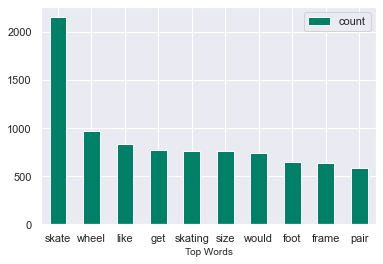

In [331]:
#Looking at the top 10 words through a bar chart for r_ files
blade_count.head(10).plot.bar(x='words', y='count', cmap='summer', rot=0)
plt.xlabel('Top Words', size=10)

#The word skate is used more than double the word wheel for "blade" category


<AxesSubplot:xlabel='Top Words'>

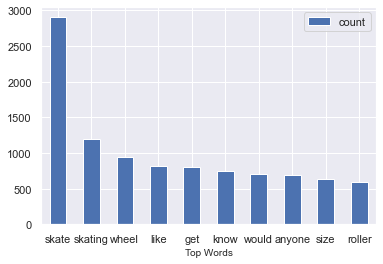

In [332]:
ax = skate_count.head(10).plot.bar(x='words', y='count', rot=0)
plt.xlabel('Top Words', size=10)

ax
#The word "skate" is used more than double the word "skating" for the "skate" category.

In [22]:
#Viewing the most similar words among some of the top words for each the blade_count clean_text dataframe.
model_b = Word2Vec(r_blading['clean_text_tok'], min_count=1, size=32) #rollerblading
model_s = Word2Vec(r_skating['clean_text_tok'], min_count=1, size=32) #rollerskating

In [318]:
model_b.most_similar('skate')

<ipython-input-318-2401f5badc04>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model_b.most_similar('skate')


[('pair', 0.9994664788246155),
 ('looking', 0.9994152784347534),
 ('first', 0.9992685914039612),
 ('since', 0.9992021918296814),
 ('new', 0.9990489482879639),
 ('year', 0.9989347457885742),
 ('buy', 0.9989055395126343),
 ('getting', 0.9987629055976868),
 ('aggressive', 0.9986566305160522),
 ('skating', 0.9986007809638977)]

In [319]:
model_s.most_similar('skate')

<ipython-input-319-d9afb8d1213f>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model_s.most_similar('skate')


[('looking', 0.9989323616027832),
 ('roller', 0.9985581636428833),
 ('vintage', 0.9981181621551514),
 ('local', 0.9981003403663635),
 ('ok', 0.998045802116394),
 ('bought', 0.9978736639022827),
 ('ice', 0.997773289680481),
 ('couple', 0.9977487921714783),
 ('research', 0.9977341890335083),
 ('decided', 0.9977049231529236)]

In [320]:
#For the word "wheel", the most similar words have no similarity between the dataframes.

display(model_b.most_similar('wheel')) #Rollerblading

display(model_s.most_similar('wheel')) #Rollerskating

<ipython-input-320-591c1c4bd0c5>:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  display(model_b.most_similar('wheel')) #Rollerblading


[('flat', 0.9994500875473022),
 ('ufs', 0.9993231296539307),
 ('rocker', 0.9993047118186951),
 ('come', 0.999220609664917),
 ('move', 0.9991948008537292),
 ('possible', 0.999189019203186),
 ('side', 0.9991346597671509),
 ('full', 0.9991185665130615),
 ('rather', 0.9990944862365723),
 ('either', 0.9990921020507812)]

<ipython-input-320-591c1c4bd0c5>:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  display(model_s.most_similar('wheel')) #Rollerskating


[('need', 0.9992428421974182),
 ('outdoor', 0.9991649985313416),
 ('would', 0.9986735582351685),
 ('wondering', 0.9986333847045898),
 ('one', 0.9983043074607849),
 ('know', 0.9982047080993652),
 ('anyone', 0.9981321692466736),
 ('want', 0.9981215000152588),
 ('good', 0.998105525970459),
 ('else', 0.998036801815033)]

In [23]:
#Word2Vec for title top2 words from the clean_text chart for both dataframes
model_b = Word2Vec(r_blading['title'], min_count=1, size=32) #rollerblading
model_s = Word2Vec(r_skating['title'], min_count=1, size=32) #rollerskating

In [148]:
#The "most similar" words for "skate", differ immensely between both dataframes. This is similar to our result from running the
#cleantext vector model, however, 3 words appear more frequently among both vs 1.
display(model_b.most_similar('skate'))
display(model_s.most_similar('skate'))

<ipython-input-148-1d81cfdf657e>:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  display(model_b.most_similar('skate'))


[('inline', 0.9166101813316345),
 ('skating', 0.9112033247947693),
 ('wheel', 0.9031567573547363),
 ('fr', 0.9018144607543945),
 ('get', 0.8970203399658203),
 ('good', 0.8946050405502319),
 ('like', 0.8938931226730347),
 ('v', 0.8886284828186035),
 ('liner', 0.8854835033416748),
 ('rollerblading', 0.8850592374801636)]

<ipython-input-148-1d81cfdf657e>:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  display(model_s.most_similar('skate'))


[('skating', 0.9194179773330688),
 ('wheel', 0.9013691544532776),
 ('lolly', 0.9001702070236206),
 ('moonlight', 0.8975560665130615),
 ('roller', 0.8965398073196411),
 ('skater', 0.8960073590278625),
 ('good', 0.8874254822731018),
 ('v', 0.8829512000083923),
 ('moxi', 0.8680331707000732),
 ('advice', 0.8660962581634521)]

In [333]:
#I did this in order to graph the datasets and their counts in one plot.
plotting = pd.concat([blade_count.head(10), skate_count.head(10)], axis=0)
plotting['col'] = (len(blade_count.head(10))*(0,) + len(skate_count.head(10))*(1,))
plotting.reset_index(inplace=True)
display(plotting.head())
display(plotting.shape)

,index,words,count,col
0,5865,skate,2155,0
1,7227,wheel,967,0
2,3724,like,833,0
3,2685,get,768,0
4,5879,skating,761,0


(20, 4)

C:\Users\Fib0nacci\anaconda3\envs\dsi\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


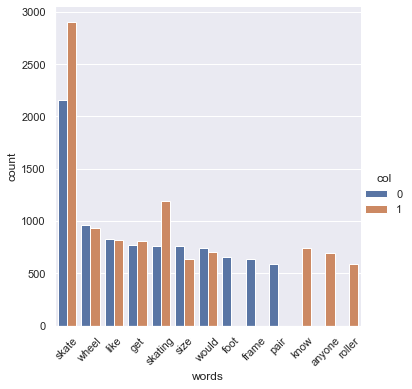

In [334]:
#Not that "col" 0 = rollerblading word count and "col" 1 = rollerskating word count.
#We can also see that the last 3 of the top 10 words are different for each subreddit.
#I chose to only look at the top 10 words since after 10, the words no longer match up.
#Word usage begins to vary substantially.
g = sns.factorplot(x='words', y = 'count', hue='col', kind='bar', data=plotting)
g.set_xticklabels(rotation=45)
sns.set(rc={'figure.figsize':(12,9)})

In [303]:
#Here I will dispay a word cloud
from wordcloud import WordCloud

There are 56497 words in the combination of all cells in column words.


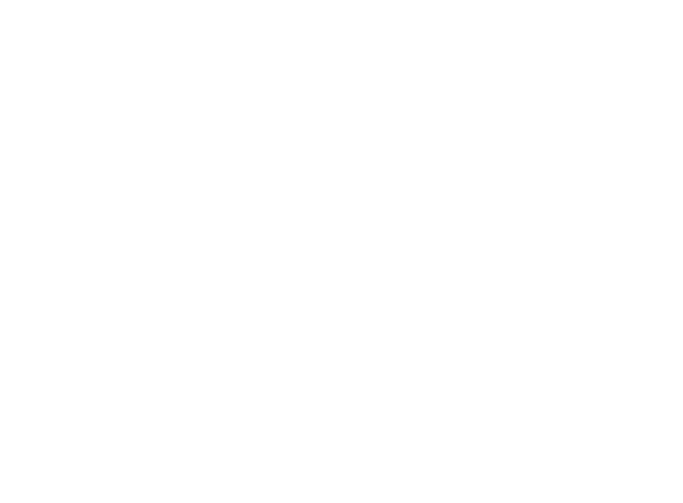

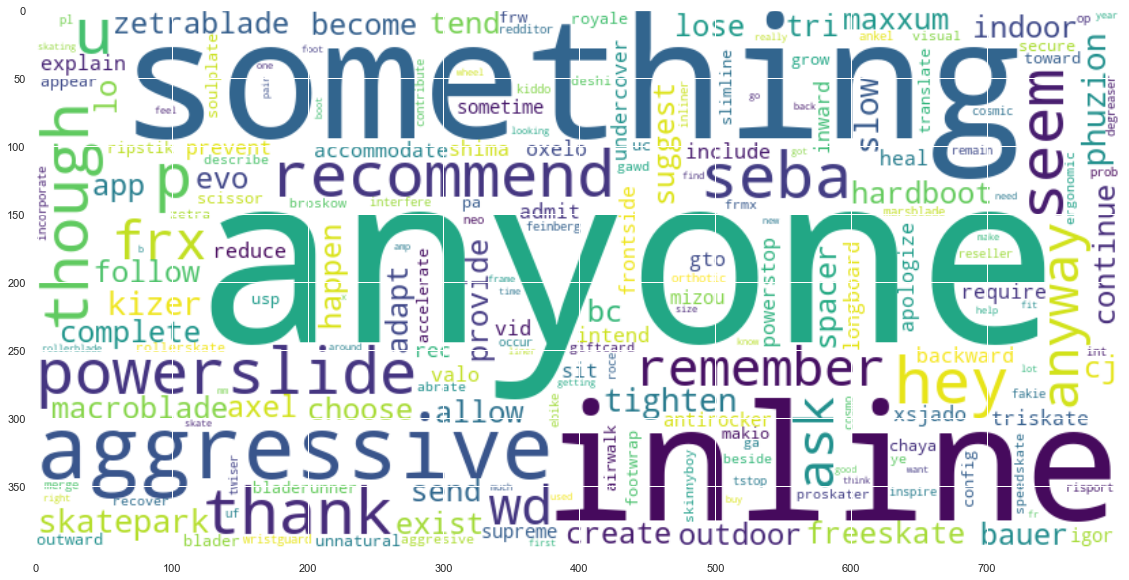

In [336]:
# changed to text of all words in column words.
#I believe the words are displaying different than from the bar charts because the text was
#re joined, and some words were reformed. That is why you see skate appear most in the bar chart
#and see skate appear in multiple words in the wordclouds.
#A portion of this code was adapted from https://re-thought.com/creating-wordclouds-in-python/

cloud = " ".join(i for i in blade_count['words'].astype(str))
print ("There are {} words in the combination of all cells in column words.".format(len(cloud)))

# Generate a word cloud image

wordcloud = WordCloud(background_color="white", width=800, height=400).generate(cloud)

# Display the generated image:
# the matplotlib way:

#plt.axis("off")
#plt.figure( figsize=(20,10))
#plt.tight_layout(pad=0)
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.show()

There are 58697 words in the combination of all cells in column words.


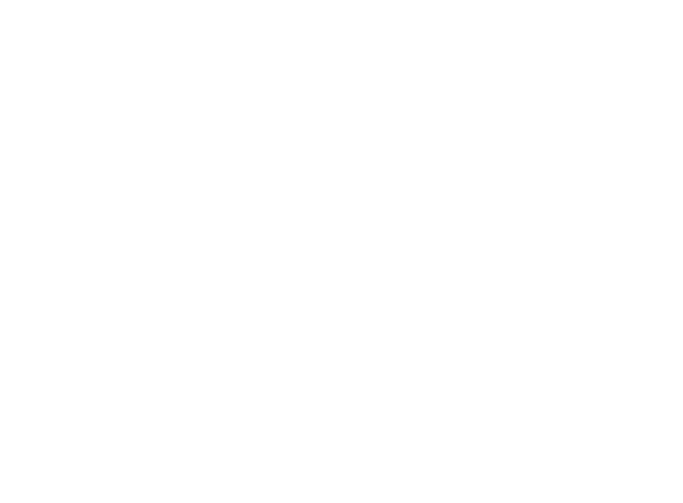

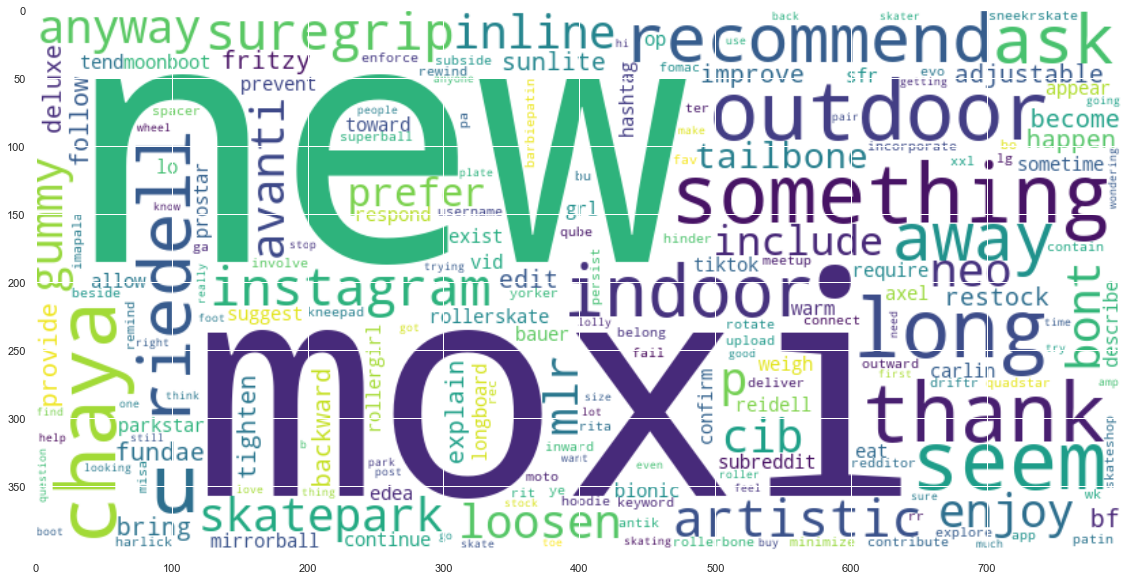

In [335]:
# changed to text of all words in column words.
#A portion of this code was adapted from https://re-thought.com/creating-wordclouds-in-python/

cloud = " ".join(i for i in skate_count['words'].astype(str))
print ("There are {} words in the combination of all cells in column words.".format(len(cloud)))

# Generate a word cloud image

wordcloud = WordCloud(background_color="white", width=800, height=400).generate(cloud)

# Display the generated image:
# the matplotlib way:

#plt.axis("off")
#plt.figure( figsize=(20,10))
#plt.tight_layout(pad=0)
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.show()

## Modeling Data

Now I will concatenate the cleaned dataframes and train 3 models (2 using GridSearch), to predict the testing set of the dataframe. I will be using grid search in order to find the best parameters used in the pipeline analysis.

In [92]:
roller_all = pd.concat([r_blading, r_skating], axis=0)
roller_all.to_csv('./data/roller_all.csv')
roller_all['subreddit'] = roller_all['subreddit'].str.lower()
roller_all


,title,subreddit,selftext,clean_text,clean_text_tok,length
0,skate recommendation,rollerblading,"Hey all,\n\nIt would be great and highly appre...",hey would great highly appreciated someone cou...,"[hey, would, great, highly, appreciated, someo...",87
2,first time wheel two month felt good even half...,rollerblading,[deleted],deleted,[deleted],1
3,european skater answering true calling looking...,rollerblading,"Hi everyone!\n\nLong story short, back when I ...",hi everyone long story short back wee little b...,"[hi, everyone, long, story, short, back, wee, ...",78
10,guy end pretty solid crossover least,rollerblading,[deleted],deleted,[deleted],1
12,beginner picking aggressive skate,rollerblading,[removed],removed,[removed],1
...,...,...,...,...,...,...
4490,get mini logo wheel,rollerskating,I’ve been looking for mini logo wheels since i...,looking mini logo wheel since seen park skater...,"[looking, mini, logo, wheel, since, seen, park...",37
4491,gear help,rollerskating,Okay so a few months ago I bought artistic rol...,okay month ago bought artistic rollerskates ac...,"[okay, month, ago, bought, artistic, rollerska...",51
4492,yellow skate setup,rollerskating,Let’s see your yellow skate set up!! I’m in ne...,let see yellow skate set need inspiration unfo...,"[let, see, yellow, skate, set, need, inspirati...",12
4493,skater aspire get level,rollerskating,My Instagram for you page is filled with skate...,instagram page filled skater massive talent co...,"[instagram, page, filled, skater, massive, tal...",39


In [93]:
#We will map 1's and 0's to the subreddit categories in the new dataframe.
#This code was adapted from chatbotslife.com/nlp
roller_all['subreddit'] = roller_all['subreddit'].map(lambda x: 1 if x =='rollerblading' else 0)
roller_all

,title,subreddit,selftext,clean_text,clean_text_tok,length
0,skate recommendation,1,"Hey all,\n\nIt would be great and highly appre...",hey would great highly appreciated someone cou...,"[hey, would, great, highly, appreciated, someo...",87
2,first time wheel two month felt good even half...,1,[deleted],deleted,[deleted],1
3,european skater answering true calling looking...,1,"Hi everyone!\n\nLong story short, back when I ...",hi everyone long story short back wee little b...,"[hi, everyone, long, story, short, back, wee, ...",78
10,guy end pretty solid crossover least,1,[deleted],deleted,[deleted],1
12,beginner picking aggressive skate,1,[removed],removed,[removed],1
...,...,...,...,...,...,...
4490,get mini logo wheel,0,I’ve been looking for mini logo wheels since i...,looking mini logo wheel since seen park skater...,"[looking, mini, logo, wheel, since, seen, park...",37
4491,gear help,0,Okay so a few months ago I bought artistic rol...,okay month ago bought artistic rollerskates ac...,"[okay, month, ago, bought, artistic, rollerska...",51
4492,yellow skate setup,0,Let’s see your yellow skate set up!! I’m in ne...,let see yellow skate set need inspiration unfo...,"[let, see, yellow, skate, set, need, inspirati...",12
4493,skater aspire get level,0,My Instagram for you page is filled with skate...,instagram page filled skater massive talent co...,"[instagram, page, filled, skater, massive, tal...",39


In [94]:
#Removing the words "deleted" and "removed".

roller_all = roller_all.replace(to_replace ="deleted", value ="") 
roller_all = roller_all.replace(to_replace ="removed", value ="") 

In [95]:
roller_all.head(7)

,title,subreddit,selftext,clean_text,clean_text_tok,length
0,skate recommendation,1,"Hey all,\n\nIt would be great and highly appre...",hey would great highly appreciated someone cou...,"[hey, would, great, highly, appreciated, someo...",87
2,first time wheel two month felt good even half...,1,[deleted],,[deleted],1
3,european skater answering true calling looking...,1,"Hi everyone!\n\nLong story short, back when I ...",hi everyone long story short back wee little b...,"[hi, everyone, long, story, short, back, wee, ...",78
10,guy end pretty solid crossover least,1,[deleted],,[deleted],1
12,beginner picking aggressive skate,1,[removed],,[removed],1
13,rollerskateusa legit skate usa,1,"I ordered from them, got an invoice, but haven...",ordered got invoice heard anything since weeke...,"[ordered, got, invoice, heard, anything, since...",17
14,x v x,1,Looking to get back into skating since I was y...,looking get back skating since younger maybe y...,"[looking, get, back, skating, since, younger, ...",62


In [96]:
#Saved the mapped dataframe and I will reload it as roller_all
roller_all.to_csv('./data/all_clean.csv')
roller_all.head()

,title,subreddit,selftext,clean_text,clean_text_tok,length
0,skate recommendation,1,"Hey all,\n\nIt would be great and highly appre...",hey would great highly appreciated someone cou...,"[hey, would, great, highly, appreciated, someo...",87
2,first time wheel two month felt good even half...,1,[deleted],,[deleted],1
3,european skater answering true calling looking...,1,"Hi everyone!\n\nLong story short, back when I ...",hi everyone long story short back wee little b...,"[hi, everyone, long, story, short, back, wee, ...",78
10,guy end pretty solid crossover least,1,[deleted],,[deleted],1
12,beginner picking aggressive skate,1,[removed],,[removed],1


In [97]:
#For more data, we will concatenate the title with the clean_text column
roller_all["clean_text"] = roller_all["title"] + ' ' + roller_all["clean_text"]

display(roller_all.head())

,title,subreddit,selftext,clean_text,clean_text_tok,length
0,skate recommendation,1,"Hey all,\n\nIt would be great and highly appre...",skate recommendation hey would great highly ap...,"[hey, would, great, highly, appreciated, someo...",87
2,first time wheel two month felt good even half...,1,[deleted],first time wheel two month felt good even half...,[deleted],1
3,european skater answering true calling looking...,1,"Hi everyone!\n\nLong story short, back when I ...",european skater answering true calling looking...,"[hi, everyone, long, story, short, back, wee, ...",78
10,guy end pretty solid crossover least,1,[deleted],guy end pretty solid crossover least,[deleted],1
12,beginner picking aggressive skate,1,[removed],beginner picking aggressive skate,[removed],1


In [108]:
print(roller_all['clean_text'][0])

0    skate recommendation hey would great highly ap...
0    anyone pair ripped useless size impala sell ch...
Name: clean_text, dtype: object


Text(0.5, 0, 'Number of Characters')

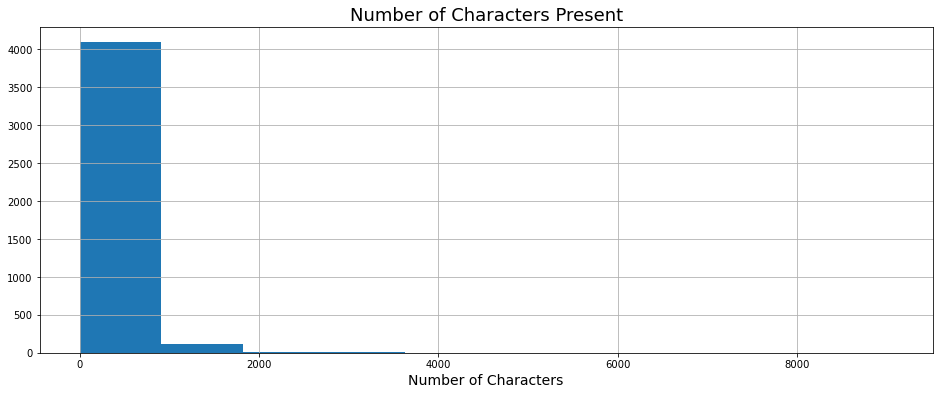

In [116]:
plt.figure(figsize=(16,6)) #number of characters present in clean_text posts
#This number seems to completely dwindle at around 3700 characters.
#Most posts had roughly 900 words and there was a small percentage of posts that had more than that.
roller_all['clean_text'].str.len().hist()
plt.title('Number of Characters Present', size=18)
plt.xlabel('Number of Characters', size=14)

Text(0.5, 0, 'Number of Words')

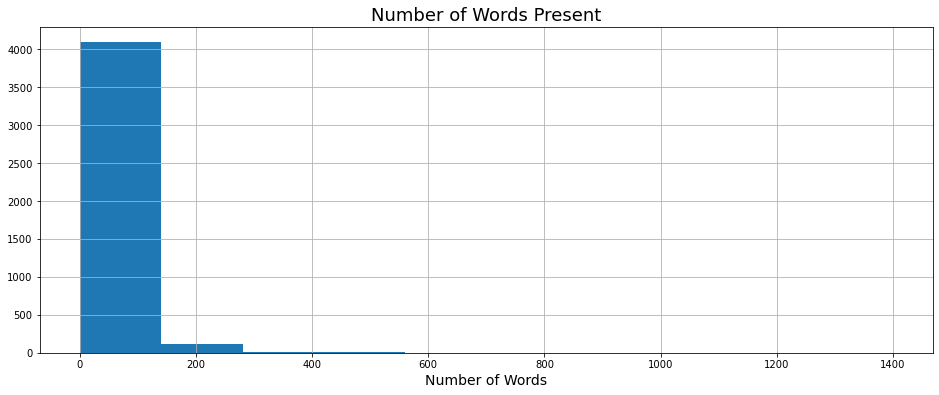

In [115]:
#number of words present in each post. Most submissions had a word count of roughly 125-150 words.
#The maximum word count appears to be around 550 words.
plt.figure(figsize=(16,6))
roller_all['clean_text'].str.split().\
    map(lambda x: len(x)).\
    hist()
plt.title('Number of Words Present', size=18)
plt.xlabel('Number of Words', size=14)


<AxesSubplot:title={'center':'Number of Word Occurrences'}, xlabel='Word Count'>

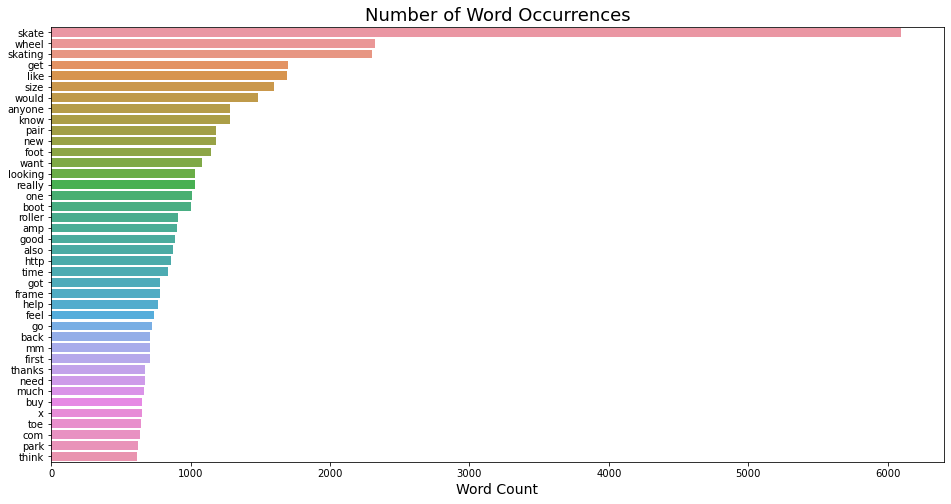

In [127]:
#Counting and storing the number of occurrences of each word. This is showing each word as a
#single entity. Reiterating what we found above, we see that skate is the word that appears the most in the dataset.

#This code was adapted from https://neptune.ai/blog/exploratory-data-analysis
import collections

corpus=[]
clean= roller_all['clean_text'].str.split()
clean=clean.values.tolist()
corpus=[word for i in clean for word in i]

counter = collections.Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]: #taking the top 40 words that occur.
    
    x.append(word)
    y.append(count)
    
plt.figure(figsize=(16,8))  
plt.title('Number of Word Occurrences', size=18)
plt.xlabel('Word Count', size=14)
sns.barplot(x=y,y=x)

For the roller_all dataset, we can concluded that the word "skate" is used more than double any other most common word in the top 40. After the first 20 words, variation in counts visibly diminishes. word usage becomes very similar in count after the word "also".

In [57]:
roller_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4231 entries, 0 to 4494
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           4231 non-null   object
 1   subreddit       4231 non-null   int64 
 2   selftext        4231 non-null   object
 3   clean_text      4231 non-null   object
 4   clean_text_tok  4231 non-null   object
 5   length          4231 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 231.4+ KB


In [1]:
#Now we will split our X and y into a train test split.
#I will not use pipeline or GridSearch for this intial model.
X = roller_all.drop(columns = ['title', 'subreddit', 'selftext', 'length', 'clean_text_tok'], axis=1)
y = roller_all['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   stratify=y,
                                                   test_size=0.3,
                                                   random_state=42)

NameError: name 'roller_all' is not defined

In [172]:
display(X.shape)
display(X_train.shape)
display(y_test.shape)
display(y_train.shape)

(4231, 1)

(2961, 1)

(1270,)

(2961,)

In [175]:
#Fitting the X_train and X_test with a count vectorizer for our baseline Naive Bayes model.

cv = CountVectorizer(stop_words='english', ngram_range=(1,2))
train_cv = cv.fit_transform(X_train['clean_text'])
#count_values= train_cv.toarray().sum(axis=0)
train_df = pd.DataFrame(train_cv.todense(), columns=cv.get_feature_names())

test_cv = cv.transform(X_test['clean_text'])
test_df = pd.DataFrame(test_cv.todense(), columns=cv.get_feature_names())

print(train_df.shape)
print(y_train.shape)
print(test_df.shape)
print(y_test.shape)

(2961, 89273)
(2961,)
(1270, 89273)
(1270,)


In [176]:
nb = MultinomialNB()
%time nb.fit(train_df, y_train)

Wall time: 20.3 s


MultinomialNB()

In [ ]:
#Calculate our baseline accuracy

In [177]:
#Make a class prediction using NB for test_df
from sklearn import metrics
y_pred_nb = nb.predict(test_df)
#Now we will calculate the accuracy of our NB predictions
print(metrics.accuracy_score(y_test, y_pred_nb))

#Now we will check our null accuracy to see how it compares to our accuracy
#A portion of this code was adapted from https://www.ritchieng.com/machine-learning-multinomial-naive-bayes-vectorization/
null_accuracy = y_test.value_counts().head(1) / len(y_test)
print(null_accuracy)

#Our accuracy comes in at 89.3% for our NB model. Mot terrible, but can be improved.
#We can see that our accuracy is higher than the null accuracy.. however, our null accuracy is very low

0.8929133858267716
0    0.513386
Name: subreddit, dtype: float64


In [342]:
#Though we have a high train score here, our test score is lower by 10%. This model is very overfit.
print('Baseline Train score', nb.score(train_df, y_train))
print('Baseline Test score', nb.score(test_df, y_test))

Baseline Train score 0.9905437352245863
Baseline Test score 0.8929133858267716


In [179]:
metrics.confusion_matrix(y_test, y_pred_nb)
#TN, FP
#FN, TP


array([[607,  45],
       [ 91, 527]], dtype=int64)

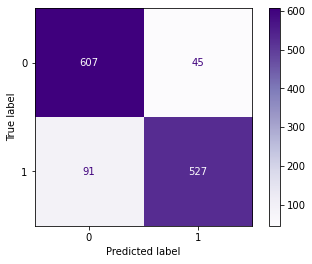

In [221]:
class_names = roller_all['subreddit'] #Naive Bayes confusion matrix.
plot_confusion_matrix(nb, test_df, y_test, cmap='Purples');

In [190]:
tp, fp, fn, tm = confusion_matrix(y_test, y_pred_nb).ravel()
#Calculating the predicted probabilities for test_df

y_pred_nb_prob = nb.predict_proba(test_df)[:, 1]

In [180]:
print(classification_report(y_test, y_pred_nb))
#Our classification report shows that our "True" values (our 1's), is above 90%, while our
#recall is at 85%. Our "False" values are nearly exact inverses of those values.
#This means that most of our predicted labels are correct in comparison to our training labels
#(for our "True" values). This is the opposite case for our "False" recall values.

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       652
           1       0.92      0.85      0.89       618

    accuracy                           0.89      1270
   macro avg       0.90      0.89      0.89      1270
weighted avg       0.89      0.89      0.89      1270



In [181]:
#Calculating the AUC
#The AUC is a single number summary of our classifier performance
#A higher value is better performance
metrics.roc_auc_score(y_test, y_pred_nb_prob) #Our AUC score is over 96% which is good .

0.9609714694144976

## Modeling with Random Forest Classifier

In addition to using Grid Search.

In [155]:
#DO NOT rerun this cell
#I will be using a random forest classifier for one model and a multinomialNB or a KNN model for the other model.
#We will grid search with the random forest classifier first. 
#cv_params = {'cv__ngram_range' : [1, 2],
            # ''
             
    
#}


pipe = Pipeline([ 
    ('cv', CountVectorizer(ngram_range=(1,2))),
    ('rf', RandomForestClassifier())
])

#setting params
params = {
    'rf__n_estimators' : [100, 120],
    'rf__max_depth' : [30,50],
    'rf__min_samples_split' : [2, 3],
    'rf__min_samples_leaf' : [3, 5],
    'rf__class_weight' : [{0: 1, 1: 1}, {0: 1, 1: 5}, {0:1, 1:1}]
    
}

#Now we will use grid search to see what scores we achieve here...

rf_gs = GridSearchCV(pipe, param_grid=params, scoring= 'roc_auc', cv= 5)
rf_gs.fit(X_train['clean_text'], y_train);


In [343]:
#Our random forest scores. There is some overfitting, however, this is a good model result
print('Random Forest Train score', rf_gs.score(X_train['clean_text'], y_train))
print('Random Forest Test score', rf_gs.score(X_test['clean_text'], y_test))

Random Forest Train score 0.9822925798086055
Random Forest Test score 0.9658593424265889


In [156]:
rf_gs.best_estimator_ #This is the best estimator based on this gridsearch for Random Forest.

Pipeline(steps=[('cv', CountVectorizer(ngram_range=(1, 2))),
                ('rf',
                 RandomForestClassifier(class_weight={0: 1, 1: 1}, max_depth=30,
                                        min_samples_leaf=3, min_samples_split=3,
                                        n_estimators=120))])

In [169]:
y_pred_acc_rf = rf_gs.predict(X_test['clean_text'])
print(classification_report(y_test, y_pred_acc_rf))
#Our accuracy is right at 89% for the Random Classifier model.
#For our "False" values (0's), precision went down 1%, while recall went up 1%.
#Our predicted labels, in regards to the recall, are coming out more incorrect it appears.
#Our "True" values are increasing in the label predictions that are correct, when compared to the
#training data.

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       652
           1       0.93      0.84      0.89       618

    accuracy                           0.89      1270
   macro avg       0.90      0.89      0.89      1270
weighted avg       0.90      0.89      0.89      1270



In [339]:
#Confusion matrix using the best estimator params. Our accuracy score is still at 89%.

#TN, FP
#FN, TP

y_preds_rf = rf_gs.best_estimator_.predict(X_test['clean_text'])
print(metrics.accuracy_score(y_test, y_preds_rf))
metrics.confusion_matrix(y_test, y_pred_acc_rf)

0.8944881889763779


array([[615,  37],
       [ 97, 521]], dtype=int64)

In [212]:
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test, y_preds_rf).ravel()
tp_rf

615

In [207]:
#Print roc_auc score for grid search random forest.
#Our AUC score is 89%, which is okay, but not as good as our NB model.
metrics.roc_auc_score(y_test,y_pred_acc_rf)

0.8931468024698712

## Logistic Regression model with GridSearch

In [192]:
#DO NOT run cell again.
#Logistic regression with Grid Search.

pipe = Pipeline([ 
    ('cv', CountVectorizer(ngram_range=(1,2))),
    ('lr', LogisticRegression())
])

#setting params
params = {
    'lr__penalty' : ['l2'],
    'lr__class_weight' : [{0: 1, 1: 1}, {0: 1, 1: 5}, {0:1, 1:1}]
    
}

#Now we will use grid search to see what scores we achieve here...

lr_gs = GridSearchCV(pipe, param_grid=params, scoring= 'roc_auc', cv= 5)
lr_gs.fit(X_train['clean_text'], y_train);

In [349]:
#In using Logistic Regression with Grid search, the training score went up by .1 compared
#to the random forest-grid search model. This model is overfit, however cause though our training
#Score went up, our testing score went down by .1.
#In comparison to our Multinomial NB model, this model outperforms on the training score.
print('Logistic Regression Train score', lr_gs.score(X_train['clean_text'], y_train))
print('Logistic Regression Test score', lr_gs.score(X_test['clean_text'], y_test))


Logistic Regression Train score 0.9999936080064284
Logistic Regression Test score 0.9569410526733774


In [193]:
lr_gs.best_estimator_ #This is the best estimator based on this gridsearch for logistic regression.

Pipeline(steps=[('cv', CountVectorizer(ngram_range=(1, 2))),
                ('lr', LogisticRegression(class_weight={0: 1, 1: 1}))])

In [209]:
y_preds_lr = lr_gs.best_estimator_.predict(X_test['clean_text'])

In [214]:
print(classification_report(y_test, y_preds_lr))
#precision score went up and our recall score went down..

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       652
           1       0.90      0.87      0.88       618

    accuracy                           0.89      1270
   macro avg       0.89      0.89      0.89      1270
weighted avg       0.89      0.89      0.89      1270



In [210]:
#Printing confusion matrix for logistic regression.
metrics.confusion_matrix(y_test, y_preds_lr)

array([[592,  60],
       [ 80, 538]], dtype=int64)

In [213]:
#Print roc_auc score for grid search linear regression.
#Our AUC score is 88%, which is 1% less than our Random Forest model.
metrics.roc_auc_score(y_test,y_preds_lr)

0.8892628109674986

## Conclusions and Recomendations

In conclusion, in relation to our problem statement, we can predict- fairly accurately- which submission a subreddit came from. If we want the best results, we should use our random forest classifier model. This model has the smallest margin between the training and testing scores, meaning that though the model is slightly overfit, it is still good at predicting our y_predict values. 

Though logistic regression had the highest training score, there was a larger margin of overfitting between the train and test scores, and the roc_auc score was the lowest of all models at 88%.

* Logistic regression and the random forest classifier both used Grid Search to find the best estimator for our models.
* 7 out of our top 10 words overlapped between both models
* The model with the highest test score was our Count Vectorized Logistic Regression model.
* The model with the lowest margin of overfitting was our count vectorized, random foreset classifier.
* Our random forest classifier also had the lowest number of false positives at 37, however our false negatives were the highest at 97.
* Our best parameters for random forest were:
    - CountVectorizer(ngram_range=(1, 2))
    - RandomForestClassifier(class_weight={0: 1, 1: 1}
    - max_depth=30 
    - min_samples_leaf=3
    - min_samples_split=3
    - n_estimators=120
    
    
 ### Recommendations
 
 * Our next steps would be to change and optimize the random forest parameters in order to get a higher training score with a lower margin of overfitting (example- TFIDF vectorizer).
 * Inversely, we can also explore the parameters for logistic regression to close the gap between the training and testing scores. 
 * Try a KNN model through a pipeline with gridsearch and adjust the KNN neighbors.
 * Try an SVM model through a pipeline with gridsearch.
 * Change the data to view comments vs submissions in subreddit.